<a href="https://colab.research.google.com/github/vineeta007/Machine-Learning-/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import sklearn

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('redwinequality.csv')
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Statistical Measures

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Exploratory Data Analysis


In [ ]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
	  df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()


0

Data Visualization

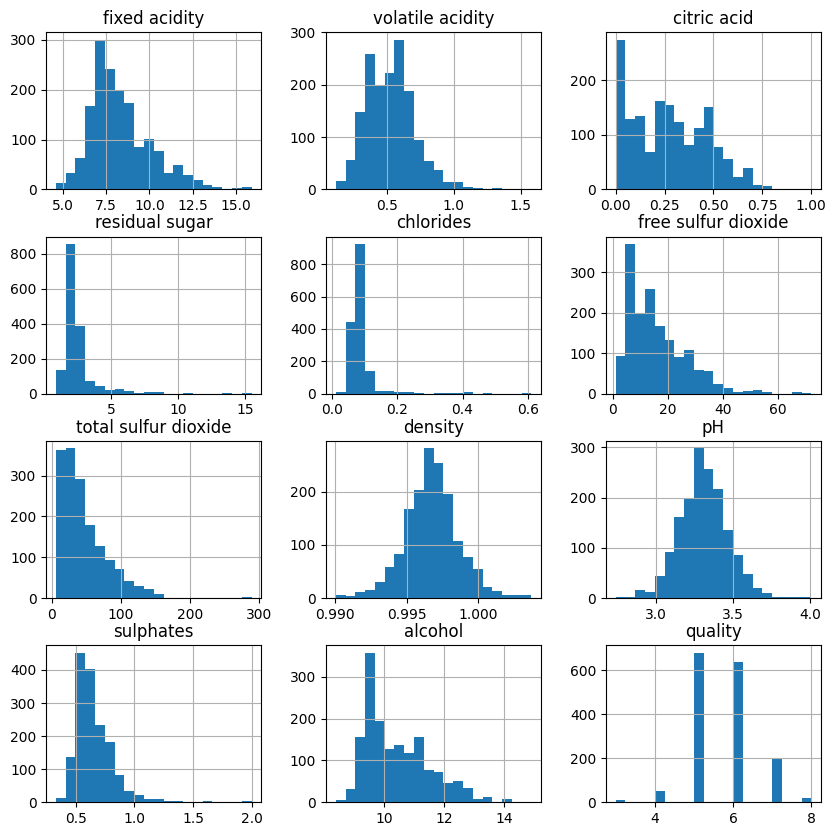

In [ ]:
df.hist(bins=20, figsize=(10, 10))
plt.show()


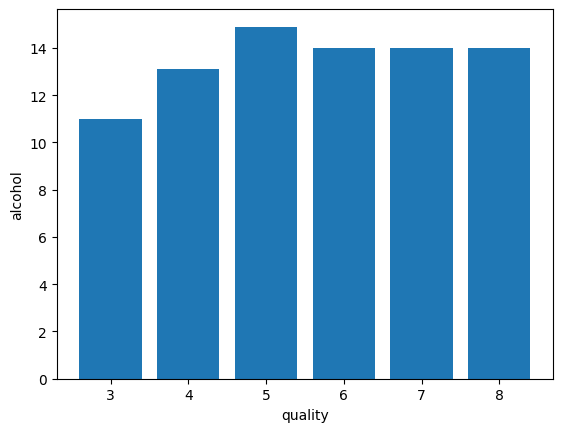

In [ ]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


Heat Map

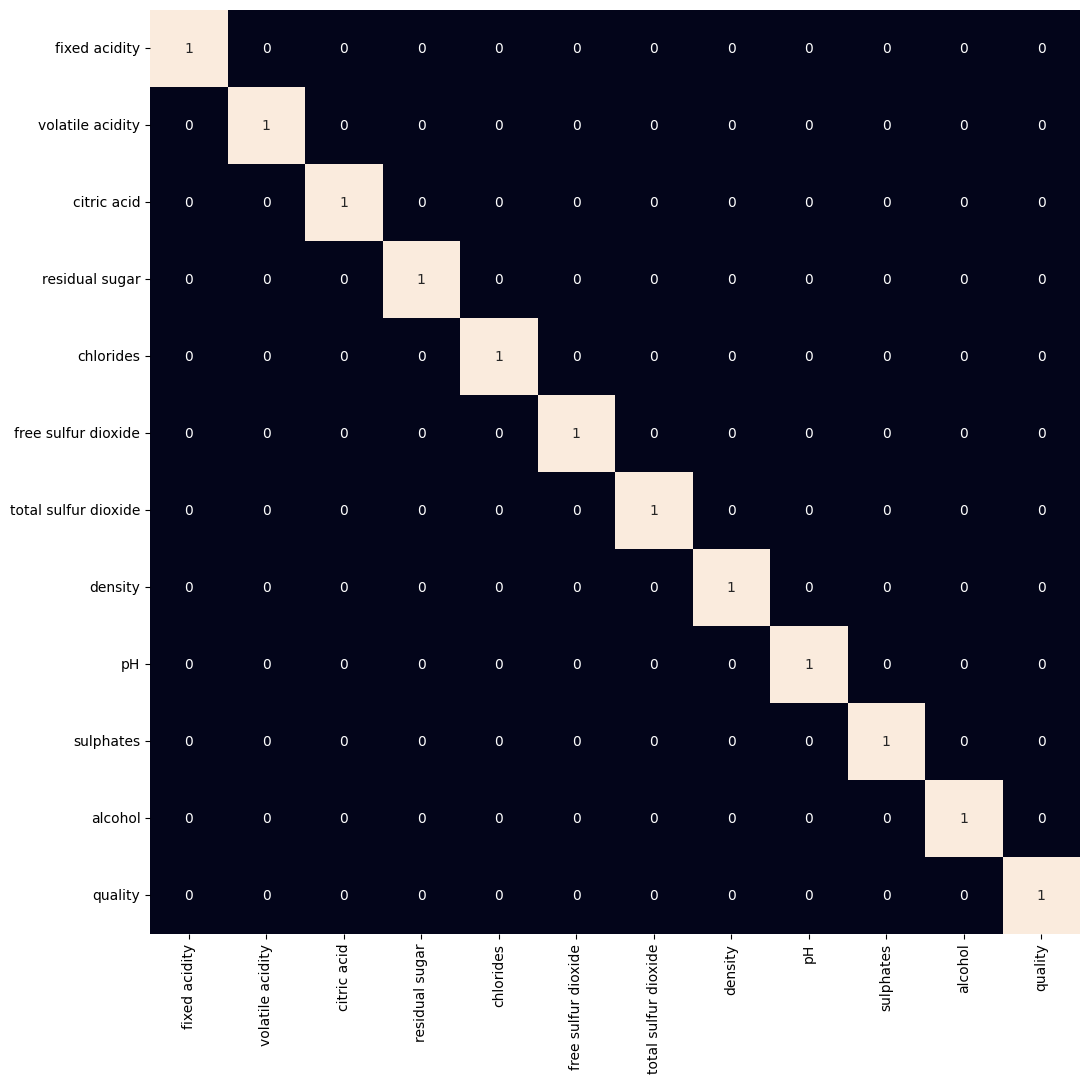

In [ ]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()


In [ ]:
df = df.drop('total sulfur dioxide', axis=1)


Model Development

In [ ]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]


Model Selection 80:20

In [ ]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape


((1279, 10), (320, 10))

In [ ]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logistic_regression = LogisticRegression()
logistic_regression.fit(xtrain, ytrain)

print('Logistic Regression: ')
print('Training Accuracy:', roc_auc_score(ytrain, logistic_regression.predict(xtrain)))
print('Validation Accuracy:', roc_auc_score(ytest, logistic_regression.predict(xtest)))
print()


Logistic Regression: 
Training Accuracy: 0.7286886534333447
Validation Accuracy: 0.765345444536196



XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_classifier = XGBClassifier()
xgb_classifier.fit(xtrain, ytrain)

print('XGBoost Classifier: ')
print('Training Accuracy:', roc_auc_score(ytrain, xgb_classifier.predict(xtrain)))
print('Validation Accuracy:', roc_auc_score(ytest, xgb_classifier.predict(xtest)))
print()


XGBoost Classifier: 
Training Accuracy: 1.0
Validation Accuracy: 0.8321733317604498



SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(xtrain, ytrain)

print('Support Vector Classifier: ')
print('Training Accuracy:', roc_auc_score(ytrain, svc_classifier.predict(xtrain)))
print('Validation Accuracy:', roc_auc_score(ytest, svc_classifier.predict(xtest)))
print()


Support Vector Classifier: 
Training Accuracy: 0.7699408577589806
Validation Accuracy: 0.7930675160237505



Model Evaluation


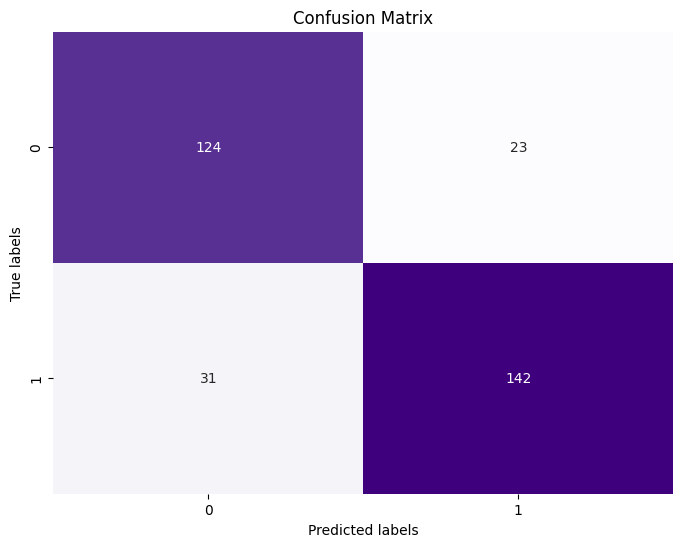

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

# Assuming models[1] is your trained model
y_pred = models[1].predict(xtest)
conf_matrix = confusion_matrix(ytest, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", cbar=False )
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



Classification report


In [ ]:
print(metrics.classification_report(ytest,
									models[1].predict(xtest)))


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       147
           1       0.86      0.82      0.84       173

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



Classification report Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_regression = LogisticRegression()
logistic_regression.fit(xtrain, ytrain)

print('Logistic Regression: ')
print('Training Accuracy:', roc_auc_score(ytrain, logistic_regression.predict(xtrain)))
print('Validation Accuracy:', roc_auc_score(ytest, logistic_regression.predict(xtest)))
print()

# Generate classification report for testing data
y_pred_test = logistic_regression.predict(xtest)

print('Classification Report (Testing Data):')
print(classification_report(ytest, y_pred_test))


Logistic Regression: 
Training Accuracy: 0.7286886534333447
Validation Accuracy: 0.765345444536196

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       147
           1       0.79      0.77      0.78       173

    accuracy                           0.77       320
   macro avg       0.76      0.77      0.76       320
weighted avg       0.77      0.77      0.77       320



Classification Report SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(xtrain, ytrain)

print('Support Vector Classifier: ')
print('Training Accuracy:', roc_auc_score(ytrain, svc_classifier.predict(xtrain)))
print('Validation Accuracy:', roc_auc_score(ytest, svc_classifier.predict(xtest)))
print()

# Generate classification report for testing data
y_pred_test = svc_classifier.predict(xtest)

print('Classification Report (Testing Data):')
print(classification_report(ytest, y_pred_test))


Support Vector Classifier: 
Training Accuracy: 0.7699408577589806
Validation Accuracy: 0.7930675160237505

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       147
           1       0.84      0.76      0.80       173

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



Classification report XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_classifier = XGBClassifier()
xgb_classifier.fit(xtrain, ytrain)

print('XGBoost Classifier: ')
print('Training Accuracy:', roc_auc_score(ytrain, xgb_classifier.predict(xtrain)))
print('Validation Accuracy:', roc_auc_score(ytest, xgb_classifier.predict(xtest)))
print()


XGBoost Classifier: 
Training Accuracy: 1.0
Validation Accuracy: 0.8321733317604498

